In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

In [3]:
data = {
    "Year": ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    "Jan": [6541.190935, 5946.537213, 6201.388808, 6399.606715, 6229.705652, 6229.705652, 6229.705652, 8381.785787, 10194.06379, 8948.122664, 8523.370006],
    "Feb": [6796.04253, 5946.537213, 6796.04253, 6739.408842, 6512.874091, 6711.091998, 8211.884723, 7475.646783, 10307.33117, 6965.943593, 7305.745719],
    "Mar": [8240.201567, 6427.923559, 6994.260437, 6597.824623, 7957.033128, 7447.329939, 8976.439508, 8721.587913, 8778.221601, 8126.934192, 8523.370006],
    "Apr": [7843.765753, 6342.973028, 6597.824623, 6342.973028, 7362.379407, 7787.132065, 8523.370006, 8636.637381, 8495.053162, 7362.379407, 8693.271069],
    "May": [7560.597314, 6654.45831, 7135.844656, 6597.824623, 8410.10263, 8580.003694, 7730.498377, 6088.121433, 9004.756352, 7900.399441, 8551.68685],
    "Jun": [6852.676217, 6059.804589, 8211.884723, 6484.557247, 7957.033128, 10222.38064, 9344.558478, 8919.80582, 9542.776385, 7843.765753, 8693.271069],
    "Jul": [6711.091998, 7249.112032, 8381.785787, 7560.597314, 7503.963626, 10392.2817, 9118.023727, 10392.2817, 9231.291103, 7560.597314, 8749.904757],
    "Aug": [6569.507779, 7560.597314, 8240.201567, 8523.370006, 7419.013095, 10392.2817, 8636.637381, 10420.59855, 8806.538445, 8098.617348, 8523.370006],
    "Sep": [6512.874091, 7475.646783, 8155.251036, 8636.637381, 7390.696251, 9599.410073, 8410.10263, 9995.845887, 8438.419474, 8013.666816, 7957.033128],
    "Oct": [6456.240403, 7022.577281, 7673.86469, 8098.617348, 7050.894125, 8636.637381, 7843.765753, 9089.706883, 8410.10263, 7900.399441, 7390.696251],
    "Nov": [5861.586682, 6937.626749, 7390.696251, 7872.082597, 6937.626749, 8353.468943, 7815.448909, 8863.172132, 8240.201567, 8211.884723, 6654.45831],
    "Dec": [6144.755121, 7305.745719, 6909.309905, 7815.448909, 6909.309905, 8523.370006, 8211.884723, 8863.172132, 8070.300, 8523.370006, 6739.408842]}



In [13]:
df = pd.DataFrame(data)

df_melted = df.melt(id_vars=["Year"], var_name="Month", value_name="Flow")


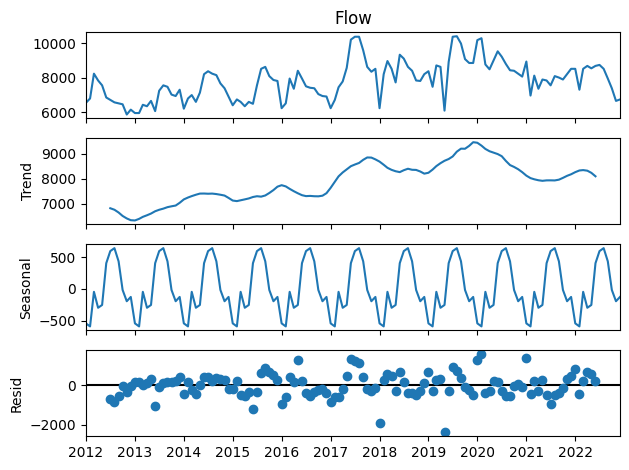

                   Flow
Date                   
2012-01-01  6541.190935
2012-02-01  6796.042530
2012-03-01  8240.201567
2012-04-01  7843.765753
2012-05-01  7560.597314
...                 ...
2022-08-01  8523.370006
2022-09-01  7957.033128
2022-10-01  7390.696251
2022-11-01  6654.458310
2022-12-01  6739.408842

[132 rows x 1 columns]


In [58]:

data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Year1": [6541.190935, 6796.04253, 8240.201567, 7843.765753,	7560.597314, 6852.676217, 6711.091998, 6569.507779,	6512.874091, 6456.240403, 5861.586682, 6144.755121],
    "Year2": [5946.537213, 5946.537213, 6427.923559, 6342.973028, 6654.45831, 6059.804589, 7249.112032, 7560.597314, 7475.646783, 7022.577281, 6937.626749, 7305.745719],
    "Year3": [6201.388808, 6796.04253, 6994.260437, 6597.824623, 7135.844656, 8211.884723, 8381.785787, 8240.201567, 8155.251036, 7673.86469, 7390.696251, 6909.309905],
    "Year4": [6399.606715, 6739.408842, 6597.824623, 6342.973028, 6597.824623, 6484.557247, 7560.597314, 8523.370006, 8636.637381, 8098.617348, 7872.082597, 7815.448909],
    "Year5": [6229.705652, 6512.874091, 7957.033128, 7362.379407, 8410.10263, 7957.033128, 7503.963626, 7419.013095, 7390.696251, 7050.894125, 6937.626749, 6909.309905],
    "Year6": [6229.705652, 6711.091998, 7447.329939, 7787.132065, 8580.003694, 10222.38064, 10392.2817, 10392.2817, 9599.410073, 8636.637381, 8353.468943, 8523.370006],
    "Year7": [6229.705652, 8211.884723, 8976.439508, 8523.370006, 7730.498377, 9344.558478, 9118.023727, 8636.637381, 8410.10263, 7843.765753, 7815.448909, 8211.884723],
    "Year8": [8381.785787, 7475.646783, 8721.587913, 8636.637381, 6088.121433, 8919.80582, 10392.2817, 10420.59855, 9995.845887, 9089.706883, 8863.172132, 8863.172132],
    "Year9": [10194.06379, 10307.33117, 8778.221601, 8495.053162, 9004.756352, 9542.776385, 9231.291103, 8806.538445, 8438.419474, 8410.10263, 8240.201567, 8070.300504],
    "Year10": [8948.122664, 6965.943593, 8126.934192, 7362.379407, 7900.399441, 7843.765753, 7560.597314, 8098.617348, 8013.666816, 7900.399441, 8211.884723, 8523.370006],
    "Year11": [8523.370006, 7305.745719, 8523.370006, 8693.271069, 8551.68685, 8693.271069, 8749.904757, 8523.370006, 7957.033128, 7390.696251, 6654.45831, 6739.408842],
}
df = pd.DataFrame(data)


df_melt = df.melt(id_vars=["Month"], var_name="Year", value_name="Flow")
df_melt['Date'] = df_melt['Year'].str.extract('(\d+)').astype(int) + 2011 
df_melt['Date'] = df_melt['Date'].astype(str) + '-' + df_melt['Month'] 
df_melt['Date'] = pd.to_datetime(df_melt['Date'], format='%Y-%b')

df_melt.set_index('Date', inplace=True)
df_melt.drop(columns=['Month', 'Year'], inplace=True)

df_melt.sort_index(inplace=True)

result = seasonal_decompose(df_melt['Flow'], model='additive', period=12)

result.plot()
plt.show()
print(df_melt)

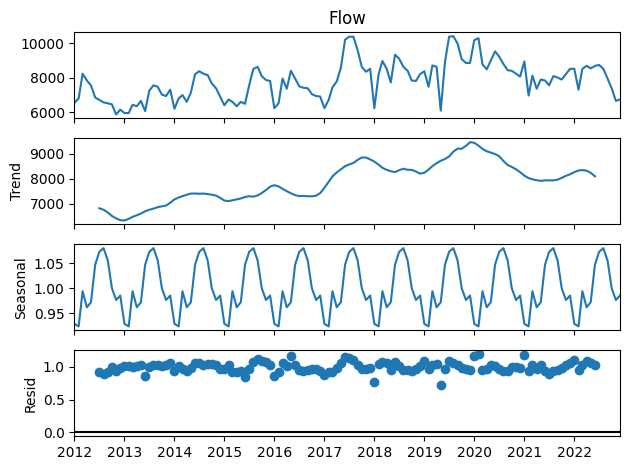

                   Flow
Date                   
2012-01-01  6541.190935
2012-02-01  6796.042530
2012-03-01  8240.201567
2012-04-01  7843.765753
2012-05-01  7560.597314
...                 ...
2022-08-01  8523.370006
2022-09-01  7957.033128
2022-10-01  7390.696251
2022-11-01  6654.458310
2022-12-01  6739.408842

[132 rows x 1 columns]


In [4]:

data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Year1": [6541.190935, 6796.04253, 8240.201567, 7843.765753,	7560.597314, 6852.676217, 6711.091998, 6569.507779,	6512.874091, 6456.240403, 5861.586682, 6144.755121],
    "Year2": [5946.537213, 5946.537213, 6427.923559, 6342.973028, 6654.45831, 6059.804589, 7249.112032, 7560.597314, 7475.646783, 7022.577281, 6937.626749, 7305.745719],
    "Year3": [6201.388808, 6796.04253, 6994.260437, 6597.824623, 7135.844656, 8211.884723, 8381.785787, 8240.201567, 8155.251036, 7673.86469, 7390.696251, 6909.309905],
    "Year4": [6399.606715, 6739.408842, 6597.824623, 6342.973028, 6597.824623, 6484.557247, 7560.597314, 8523.370006, 8636.637381, 8098.617348, 7872.082597, 7815.448909],
    "Year5": [6229.705652, 6512.874091, 7957.033128, 7362.379407, 8410.10263, 7957.033128, 7503.963626, 7419.013095, 7390.696251, 7050.894125, 6937.626749, 6909.309905],
    "Year6": [6229.705652, 6711.091998, 7447.329939, 7787.132065, 8580.003694, 10222.38064, 10392.2817, 10392.2817, 9599.410073, 8636.637381, 8353.468943, 8523.370006],
    "Year7": [6229.705652, 8211.884723, 8976.439508, 8523.370006, 7730.498377, 9344.558478, 9118.023727, 8636.637381, 8410.10263, 7843.765753, 7815.448909, 8211.884723],
    "Year8": [8381.785787, 7475.646783, 8721.587913, 8636.637381, 6088.121433, 8919.80582, 10392.2817, 10420.59855, 9995.845887, 9089.706883, 8863.172132, 8863.172132],
    "Year9": [10194.06379, 10307.33117, 8778.221601, 8495.053162, 9004.756352, 9542.776385, 9231.291103, 8806.538445, 8438.419474, 8410.10263, 8240.201567, 8070.300504],
    "Year10": [8948.122664, 6965.943593, 8126.934192, 7362.379407, 7900.399441, 7843.765753, 7560.597314, 8098.617348, 8013.666816, 7900.399441, 8211.884723, 8523.370006],
    "Year11": [8523.370006, 7305.745719, 8523.370006, 8693.271069, 8551.68685, 8693.271069, 8749.904757, 8523.370006, 7957.033128, 7390.696251, 6654.45831, 6739.408842],
}
df = pd.DataFrame(data)


df_melt = df.melt(id_vars=["Month"], var_name="Year", value_name="Flow")
df_melt['Date'] = df_melt['Year'].str.extract('(\d+)').astype(int) + 2011 
df_melt['Date'] = df_melt['Date'].astype(str) + '-' + df_melt['Month'] 
df_melt['Date'] = pd.to_datetime(df_melt['Date'], format='%Y-%b')

df_melt.set_index('Date', inplace=True)
df_melt.drop(columns=['Month', 'Year'], inplace=True)

df_melt.sort_index(inplace=True)

result = seasonal_decompose(df_melt['Flow'], model='multiplicative', period=12)

result.plot()
plt.show()
print(df_melt)

/Users/linrongcai/research/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/linrongcai/research/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[Timestamp('2023-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-03-01 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-06-01 00:00:00'), Timestamp('2023-07-01 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-10-01 00:00:00'), Timestamp('2023-11-01 00:00:00'), Timestamp('2023-12-01 00:00:00')]


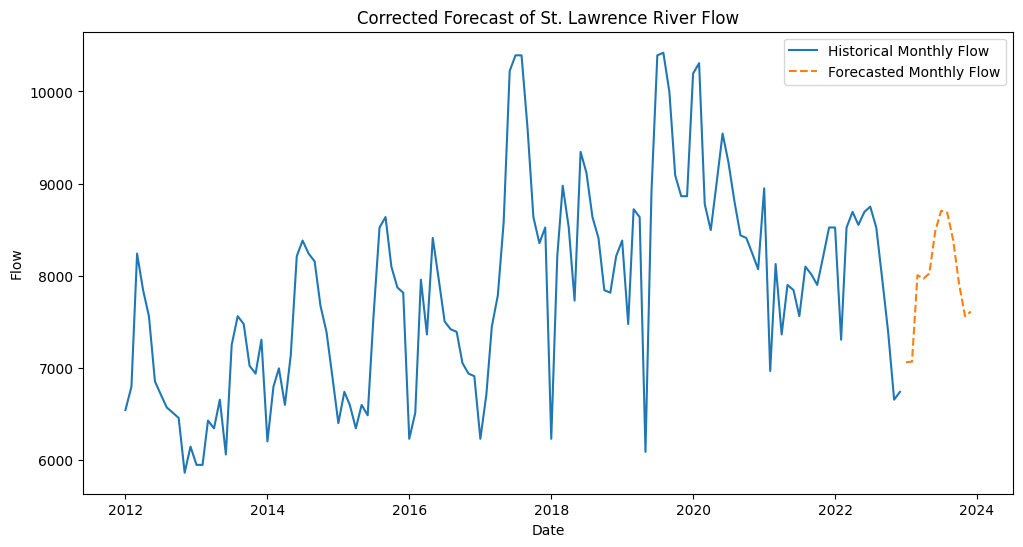

,predicted_mean
2023-01-01,7059.708883
2023-02-01,7068.185841
2023-03-01,8005.619886
2023-04-01,7969.206951
2023-05-01,8023.324429
2023-06-01,8487.278164
2023-07-01,8705.307068
2023-08-01,8686.847823
2023-09-01,8385.389175
2023-10-01,7913.611264


In [56]:
p, d, q = 1, 1, 1 
P, D, Q, S = 1, 1, 1, 12  

model_corrected = SARIMAX(df_melt['Flow'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit_corrected = model_corrected.fit(disp=False)

future_dates_corrected = [df_melt.index[-1] + DateOffset(months=x) for x in range(1, 13)]
print(future_dates_corrected)
forecast_corrected = model_fit_corrected.predict(start=future_dates_corrected[0], end=future_dates_corrected[-1])

forecast_df_corrected = pd.DataFrame(forecast_corrected, columns=['predicted_mean'])

plt.figure(figsize=(12, 6))
plt.plot(df_melt.index, df_melt['Flow'], label='Historical Monthly Flow')


plt.plot(forecast_df_corrected.index, forecast_df_corrected['predicted_mean'], label='Forecasted Monthly Flow', linestyle='--')
plt.title('Corrected Forecast of St. Lawrence River Flow')
plt.xlabel('Date')
plt.ylabel('Flow')
plt.legend()
plt.show()

forecast_df_corrected


In [43]:
print(df_melt.index[-1])
print([DateOffset(months=x) for x in range(1, 13)])
print(future_dates_corrected[0])
print(future_dates_corrected[-1])
print(forecast_corrected)

2022-12-01 00:00:00
[<DateOffset: months=1>, <DateOffset: months=2>, <DateOffset: months=3>, <DateOffset: months=4>, <DateOffset: months=5>, <DateOffset: months=6>, <DateOffset: months=7>, <DateOffset: months=8>, <DateOffset: months=9>, <DateOffset: months=10>, <DateOffset: months=11>, <DateOffset: months=12>]
2023-01-01 00:00:00
2023-12-01 00:00:00
2023-01-01    7059.708883
2023-02-01    7068.185841
2023-03-01    8005.619886
2023-04-01    7969.206951
2023-05-01    8023.324429
2023-06-01    8487.278164
2023-07-01    8705.307068
2023-08-01    8686.847823
2023-09-01    8385.389175
2023-10-01    7913.611264
2023-11-01    7560.644565
2023-12-01    7611.134771
Freq: MS, Name: predicted_mean, dtype: float64
